




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

### 
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exercise Review](#0)<br>
2.  [Matplotlib!](#2)<br>
2.  [Exercise](#10)<br> 
3.  [Exercise](#12)<br>     
</div>
<hr>

<h3>Exercise from last class:

Using our US_Presidents.txt file and Pandas

1) Clean the data

2) Reorder all the presidents by their index. Which is the number of president they are. Washington is 1st, Adams is 2nd, etc

3) Create columns first name, middle name, last name. If they don't have a a middle name, leave it blank

4) Add a column called term length. Which tells us how long they were in office for 

Solution:


In [139]:
import pandas as pd


pres_data = pd.read_csv('US_Presidents_unordered.txt')


#1 Clean data
    # Fix column names
pres_data.columns=['Name', 'Term Start', 'Term End']
    # remove all single quotes and periods
pres_data = pres_data.apply(lambda x:x.str.replace('\'', '').str.replace('.',''))


#3 Split names into seperate columns with relevant names
pres_data[['Pres #', 'First', 'Initial', 'Last']] = pres_data['Name'].str.split(' ',expand=True)
    # If the middle name column has a last name in it, move it to the last name column
pres_data.loc[pres_data['Initial'].str.len() > 1, 'Last'] = pres_data['Initial']
    # if the middle name has a last name, change it to none
pres_data.loc[pres_data['Initial'].str.len() > 1, 'Initial'] = None


#2 Re order presidents by their pre number
    # Setting the dataframes index to the president number
pres_data.set_index(pres_data['Pres #'], inplace=True)
    # Converting the index to an integer
pres_data.index = pres_data.index.astype(int)
    # Sorting the dataframe by index
pres_data.sort_index(inplace=True)


# dropping the old name and president number
pres_data.drop(columns=['Name', 'Pres #'], inplace=True)

pres_data['Length'] = pd.to_datetime(pres_data['Term End']) - pd.to_datetime(pres_data['Term Start'])



print(pres_data)

        Term Start    Term End       First Initial        Last    Length
Pres #                                                                  
1       04/30/1789  03/04/1797      George    None  Washington 2865 days
2       03/04/1797  03/04/1801        John    None       Adams 1460 days
3       03/04/1801  03/04/1809      Thomas    None   Jefferson 2922 days
4       03/04/1809  03/04/1817       James    None     Madison 2922 days
5       03/04/1817  03/04/1825       James    None      Monroe 2922 days
6       03/04/1825  03/04/1829        John    None      Quincy 1461 days
7       03/04/1829  03/04/1837      Andrew    None     Jackson 2922 days
8       03/04/1837  03/04/1841      Martin    None         Van 1461 days
9       03/04/1841  04/04/1841     William    None       Henry   31 days
10      04/04/1841  03/04/1845        John    None       Tyler 1430 days
11      03/04/1845  03/04/1849       James       K        Polk 1461 days
12      03/04/1849  07/09/1850     Zachary    None 

/var/folders/hl/rnkm2m_d3s92k66lxdhnvbpr0000gn/T/ipykernel_2190/484534427.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pres_data = pres_data.apply(lambda x:x.str.replace('\'', '').str.replace('.',''))


# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python.
Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [140]:
import matplotlib as mpl


The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [141]:
plt.style.use('classic')

AttributeError: 'AxesSubplot' object has no attribute 'style'

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.
For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb).

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [ ]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [ ]:
!ls -lh my_figure.png

-rw-r--r--  1 jakevdp  staff    16K Aug 11 10:59 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

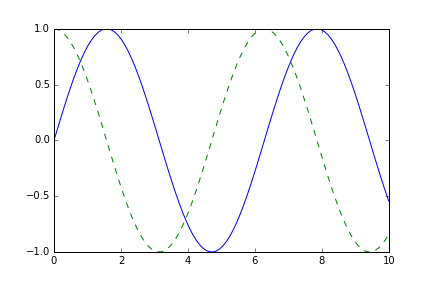

In [ ]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [ ]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands discussed earlier.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

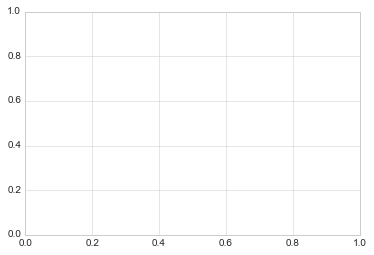

In [ ]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

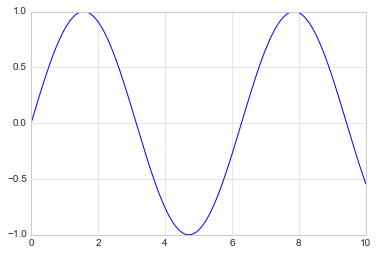

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces):

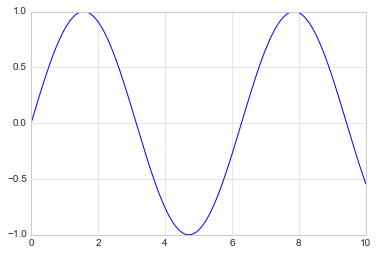

In [ ]:
plt.plot(x, np.sin(x));

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

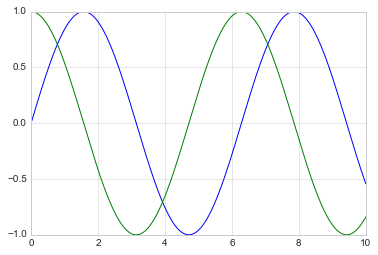

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

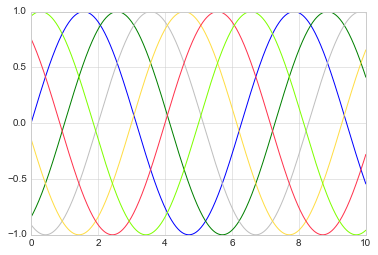

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

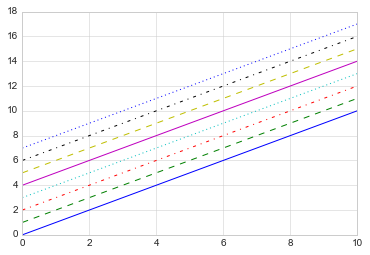

In [ ]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

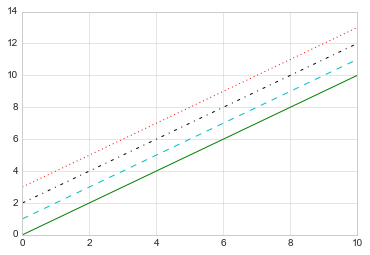

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using IPython's help tools (See [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)).

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

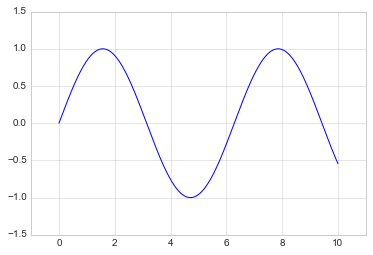

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

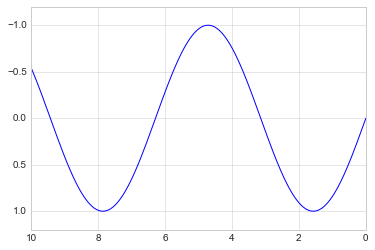

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

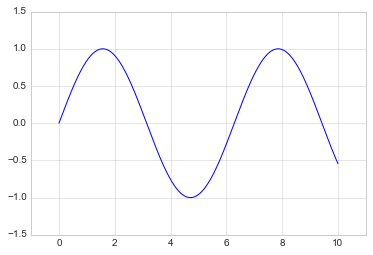

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

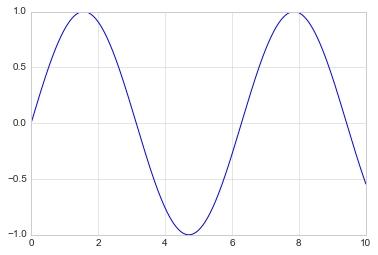

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('tight');

It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

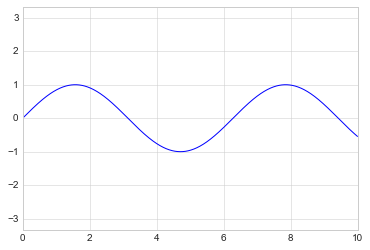

In [ ]:
plt.plot(x, np.sin(x))
plt.axis('equal');

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots

As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

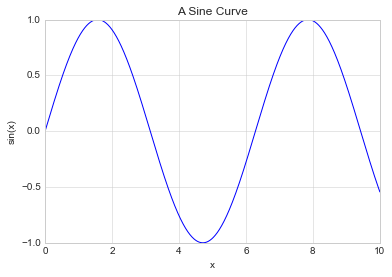

In [ ]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

The position, size, and style of these labels can be adjusted using optional arguments to the function.
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

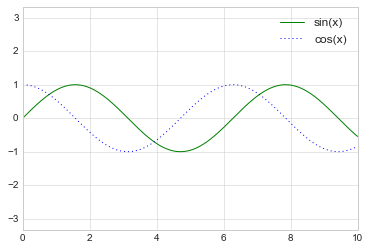

In [ ]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

<h2> Exercise </h2> 
Use the previously used yahoo finance pickle files to create two new dataframes. <br>
1) Plot the price of Apple in the month of January against the volume of Apple in January. <br> 
2) Plot the price of IBM in April against the price of Miscrosoft in April and compare. <br> 
3) Plot all prices over the year of 2010 in one graph. This may require some experimentation on your end to see what fits, what doesn't. <br>

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

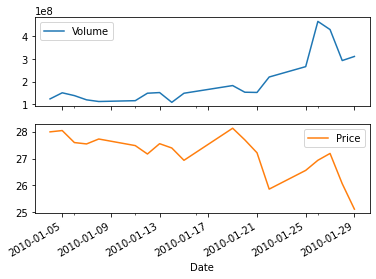

In [15]:
import pandas as pd

# 1) Plot the price of Apple in the month of January against the volume of Apple in January. 

price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

# Join the two series into one dataframe of Date, Price, Volume
#   and filter by the year/month requested
aapl_jan = pd.concat([price['AAPL'].rename('Price'), volume['AAPL'].rename('Volume')], axis=1).loc['2010-01']

# Plot the dates/prices and dates/volumes
aapl_jan.plot(y=['Volume', 'Price'], use_index = True, subplots = True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

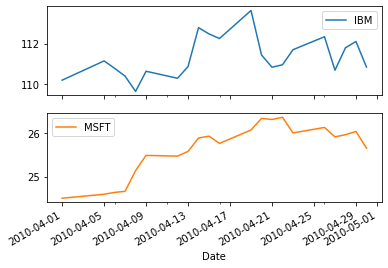

In [17]:
import pandas as pd

# 2) Plot the price of IBM in April against the price of Miscrosoft in April and compare. 

price = pd.read_pickle('yahoo_price.pkl')

# date ranges for IBM and MSFT columns
april_ibm_msft = pd.concat([price['IBM'], price['MSFT']], axis = 1).loc['2010-04']

april_ibm_msft.plot(y=['IBM','MSFT'], use_index = True, subplots=True)


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

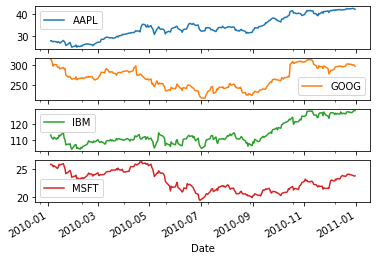

In [11]:
import pandas as pd

# 3) Plot all prices over the year of 2010 in one graph.

price = pd.read_pickle('yahoo_price.pkl').loc['2010']

price.plot(y=['AAPL','GOOG','IBM','MSFT'], subplots=True)

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring; additionally, we will cover some more advanced legend options in [Customizing Plot Legends](04.06-Customizing-Legends.ipynb).

<h3> Problem </h3>
(for homework if not finished) 

Using the class_heights.txt file and Pandas

1) Clean the data

2) Make column names Title Case 

3) Sort gender column by Gender. Female first.

4) Convert heights to centimeters

5) Count how many of each gender are in the total class_heights

6) Calc the average height of each gender and the class total

7) Calc the median, mode, and standard deviantion for the total class

8) Plot female heights against male heights in matplotlib using different colors.

Solution: